In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
dataset_root = 'data/'
#preprocessed_articles = pd.read_csv(dataset_root + 'preprocessed_articles.csv',sep = ';',index_col = [0], encoding = "utf-8")
#articles = pd.read_csv(dataset_root + 'articles.csv',sep = ';',index_col = [0], encoding = "utf-8")
articles = pd.read_csv(dataset_root + 'preprocessed_articles.csv',sep = ';',index_col = [0], encoding = "utf-8")
articles['title'] = articles['title'].str.replace('\W', ' ') # Remove special characters from titles
articles['content'] = articles['content'].str.replace('\W', ' ') # Remove special character from content
articles = articles.rename(columns = {'region':'regione', 'date':'data'})
articles

,title,content,data,author,regione,zone
0,d albert riunion anci regional decar,teram president gianguid d albert partecip riu...,2020-04-15,Abruzzonews,Abruzzo,Centre
1,coronavirus novit introdott dpcm 10 april 2020,sit minister dell intern stat pubblic dirett i...,2020-04-15,Abruzzonews,Abruzzo,Centre
2,coronavirus nuov misur vend gener alimentar a...,pescar oggi mercoled 15 aprile president reg...,2020-04-15,Abruzzonews,Abruzzo,Centre
3,regione ecco guid formazion distanz iefp,pescar ver propr guid oper grad rispond dubb i...,2020-04-15,Abruzzonews,Abruzzo,Centre
4,ministr amendol oddat all iniz pd abruzz facebook,region le scelt pd l ital l abruzzo intito...,2020-04-15,Abruzzonews,Abruzzo,Centre
...,...,...,...,...,...,...
24579,cop pir giornal telegram salg 114 canal oscur,sal 114 numer canal telegram sequestr procur b...,2020-05-04,La Repubblica,Lazio,Centre
24580,inchiest sanit umbra chius indagini l ex gov...,chiusur dell indagin assunzion sanità destabi...,2020-05-04,La Repubblica,Lazio,Centre
24581,coronavirus italia 3691 denunc prim giorn fas 2,rom aspett boom sanzion prim giorn fas due ...,2020-05-05,La Repubblica,Lazio,Centre
24582,coronavirus medicina denunc azione tropp p...,ventiduemil medic pront entrar specialità and...,2020-05-06,La Repubblica,Lazio,Centre


In [3]:
import nltk
from nltk.corpus import stopwords
stop_words_italian = stopwords.words('italian')

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words= stop_words_italian)
doc_term_matrix = tfidf_vect.fit_transform((articles.title + articles.content).values)

In [5]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=2, random_state=42)
nmf.fit(doc_term_matrix)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=2, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [6]:
topic_values = nmf.transform(doc_term_matrix)
articles['topic'] = topic_values.argmax(axis=1)

In [7]:
topic_keywords = []

for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    topic_keyword_list = [tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-50:]]
    topic_keywords.append(topic_keyword_list)
    print(topic_keyword_list)
    
    print('\n')
    
topic_keywords = topic_keywords[-1] # Keep the last

Top 10 words for topic #0:
['quand', 'reat', 'ordin', 'mentr', 'esser', 'compagn', 'intern', 'fatt', 'strad', 'sostanz', 'tre', 'propr', 'incident', 'spacc', 'senz', 'procur', 'oper', 'interven', 'cors', 'press', 'abit', 'sequestr', 'alcun', 'forz', 'local', 'aver', 'fuoc', 'militar', 'poi', 'prim', 'giovan', 'ferm', 'vigil', 'port', 'fin', 'donn', 'agent', 'post', 'trov', 'via', 'dop', 'denunc', 'uom', 'controll', 'anni', 'poliz', 'due', 'carabinier', 'arrest', 'stat']


Top 10 words for topic #1:
['esser', 'struttur', 'iniz', 'ieri', 'guar', 'virus', 'ore', 'casi', 'regional', 'attiv', 'ultim', 'sal', 'decess', 'tutt', 'comun', 'sol', 'total', 'registr', 'medic', 'asl', 'president', 'isol', 'prim', 'emergt', 'stat', 'mort', 'oggi', 'terap', 'dat', 'lavor', 'risult', 'test', 'sanitar', 'ospedal', 'rispett', 'giorn', 'provinc', 'numer', 'ricover', 'region', 'tampon', 'nuov', '19', 'contag', 'person', 'pazient', 'covid', 'posit', 'cas', 'coronavirus']




In [8]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(df, keywords) :
    for col in keywords :
        df[col] = 0
        
    
        #indexes = articles[k in articles.content].index
        
        #articles.loc[indexes, k] = 1
        
        #if any(word in 'some one long two phrase three' for word in list_):
    
    for k in keywords:
        indexes = df[df['content'].str.contains(k)].index
        df.loc[indexes, k] = 1
        
    return df

articles = one_hot_encoding(articles, topic_keywords)
articles = articles.groupby('data').sum()

In [9]:
prociv_data = pd.read_csv(dataset_root + 'prociv_data.csv', sep = ';', index_col = [0])
prociv_data = prociv_data.rename(columns = {'denominazione_regione':'regione'})
#prociv_data = prociv_data[prociv_data.regione == 'Lombardia']
prociv_data

regions = prociv_data.regione.unique().tolist()
regions

def one_hot_encoding_regions(df, regions) :
    for col in regions :
        df[col] = 0
        
    
        #indexes = articles[k in articles.content].index
        
        #articles.loc[indexes, k] = 1
        
        #if any(word in 'some one long two phrase three' for word in list_):
    
    for k in regions:
        indexes = df[df['regione'].str.contains(k)].index
        df.loc[indexes, k] = 1
        
    return df


In [10]:
prociv_national = prociv_data.groupby('data').sum()
prociv_national = prociv_national.reset_index()

In [11]:
complete_dataset = articles.merge(prociv_national, on = 'data')
target = complete_dataset['totale_casi'].values

In [12]:
# In case we want to expand the dataset, merge here

In [13]:
from datetime import date
import datetime

def date_to_delta_time(date):
    '''
    tokens = [int(x) for x in date.split('-')]
    
    d0 = date(2020, 1, 1)
    d1 = date(tokens[0], tokens[1], tokens[2])
    delta = d1 - d0
    print(delta.days)
    '''
    
    date_time_str = date
    date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d')

    return int(date_time_obj.timestamp() / (60 * 60 * 24) )
    
complete_dataset = articles.reset_index()
complete_dataset['timestamp'] = [date_to_delta_time(complete_dataset.loc[i, 'data']) for i in complete_dataset.index]
complete_dataset.drop(columns = ['data'], inplace = True)

In [14]:
complete_dataset

,topic,esser,struttur,iniz,ieri,guar,virus,ore,casi,regional,...,nuov,19,contag,person,pazient,covid,posit,cas,coronavirus,timestamp
0,95,69,26,34,34,43,69,92,10,29,...,26,44,24,94,24,17,28,113,67,18315
1,86,60,30,26,43,50,57,81,14,42,...,31,46,24,104,18,12,33,121,53,18316
2,83,58,22,32,42,56,53,90,19,29,...,38,34,21,80,17,8,37,116,51,18317
3,72,65,27,28,24,46,39,93,14,36,...,18,49,11,110,12,9,28,109,35,18318
4,56,58,27,26,28,38,45,98,15,23,...,29,42,21,97,8,12,26,102,42,18319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,97,73,22,49,57,68,52,103,22,38,...,53,98,30,132,18,53,39,133,43,18410
96,70,63,20,37,50,56,35,75,13,22,...,42,66,28,99,16,39,33,93,30,18411
97,50,38,9,23,37,25,20,58,10,15,...,27,38,13,65,10,24,14,79,18,18412
98,1,1,0,0,0,1,1,0,0,0,...,2,1,1,2,1,0,1,1,1,18413


In [15]:
train = complete_dataset
train

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train, target, test_size=0.33, random_state=42)

y_train

array([ 63927, 231139,   1128, 205463, 203591, 101739,  12462, 159516,
        97689,   2036, 232248,  59138,  21157, 223885,  47021, 197675,
         7375,  41035,    650,  15113, 115242,   2502, 221216,   1694,
       201505, 105792, 229327, 181228, 233515, 175925, 135586, 162488,
       207428, 147577, 209328, 195351, 233019, 222104, 128948, 187327,
       156363, 233197, 183957, 218268,  86498, 231732, 189973, 199414,
       225886, 110574,  69176,    322, 168941,  27980,    400,  35713,
       228006, 230158, 217185, 227364, 224760,  24747, 192994, 213013,
         9172, 230555, 165155])

In [16]:
from sklearn.ensemble import RandomForestRegressor as Reg

regressor = Reg()
regressor.fit(X_train, y_train)

predicted_y = regressor.predict(X_test)

225435  |  225552.64
172434  |  169545.85
211938  |  212556.46
143626  |  154476.66
139422  |  150712.01
119827  |  112024.79
31506  |  29703.89
223096  |  226850.51
3858  |  1738.91
229  |  2069.92
17660  |  20888.17
74386  |  92050.64
215858  |  215580.32
92472  |  84023.7
229858  |  231431.83
888  |  1236.03
219070  |  226431.21
219814  |  214062.99
5883  |  9112.72
80539  |  95755.76
178972  |  176686.07
228658  |  223623.99
53578  |  51748.39
132547  |  140282.88
210717  |  210781.74
10149  |  11714.14
124632  |  128021.07
232664  |  231568.66
3089  |  7046.53
214457  |  213077.39
4636  |  3225.23
152271  |  158666.78
226699  |  224953.61


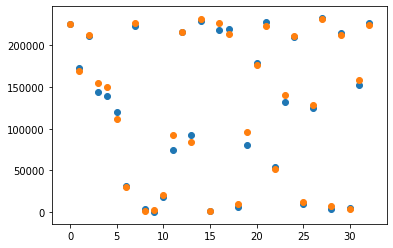

In [17]:
from sklearn.metrics import mean_squared_error as mse

for i in range(len(predicted_y)):
    print(y_test[i], ' | ', predicted_y[i])
    
plt.scatter(range(len(y_test)), y_test, color = 'C0')
plt.scatter(range(len(y_test)), predicted_y, color = 'C1')
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler as Scaler

all_data = []

for i in range(len(predicted_y)):
    all_data.append([y_test[i], predicted_y[i]])
    
scaler = Scaler()

y_test = []
y_pred = []

for elem in scaler.fit_transform(all_data):
    y_test.append(elem[0])
    y_pred.append(elem[1])

mse(y_test, y_pred)
    

0.0045172874444872205

In [19]:
articles.index

Index(['2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
       '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
       '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
       '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
       '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
       '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
       '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18',
       '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
       '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28',

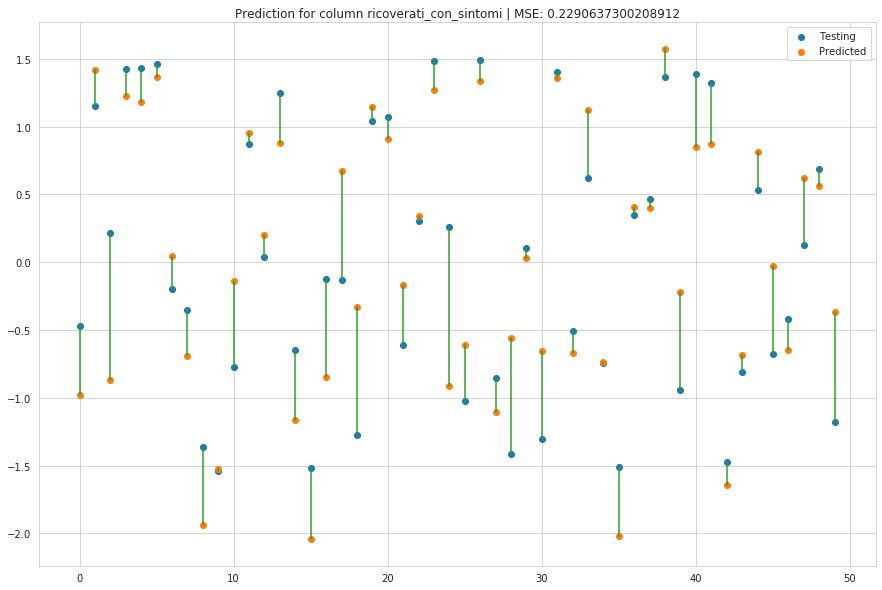

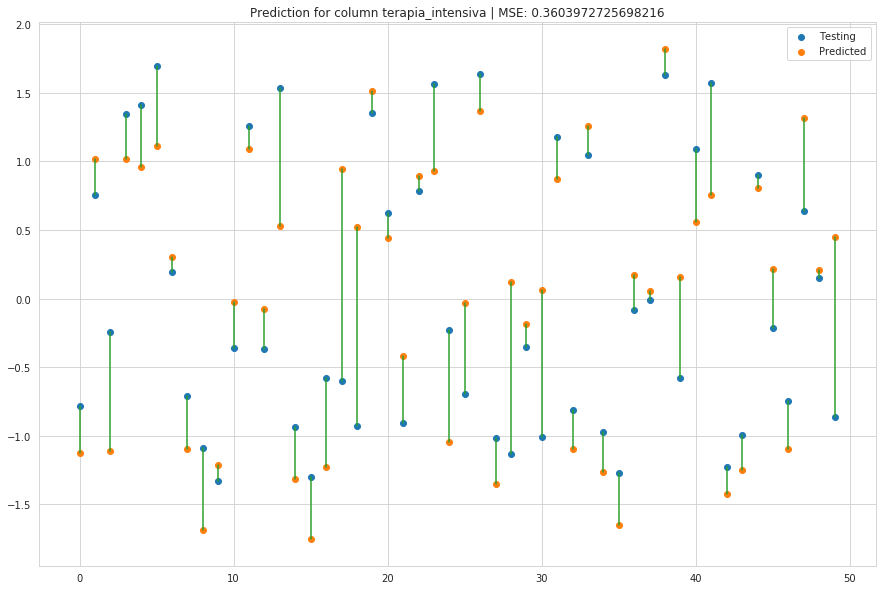

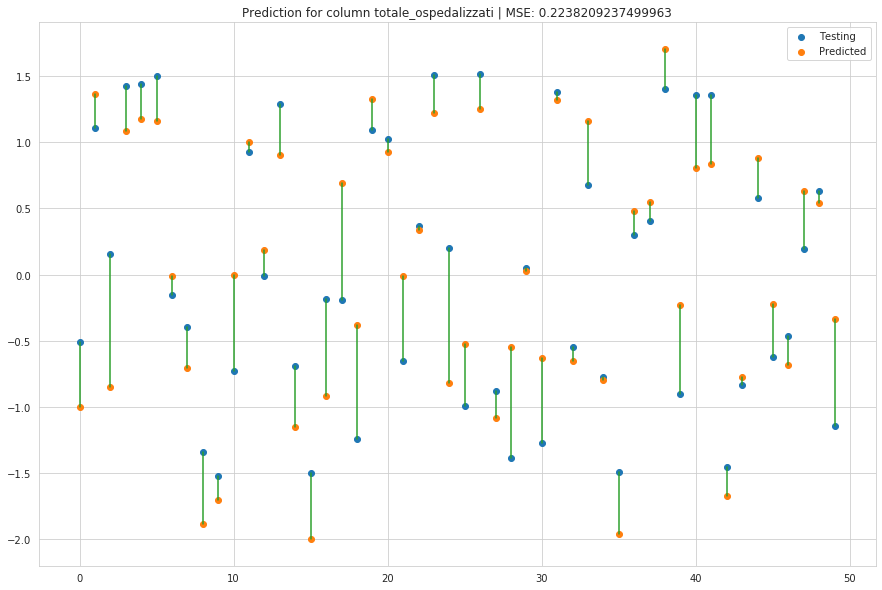

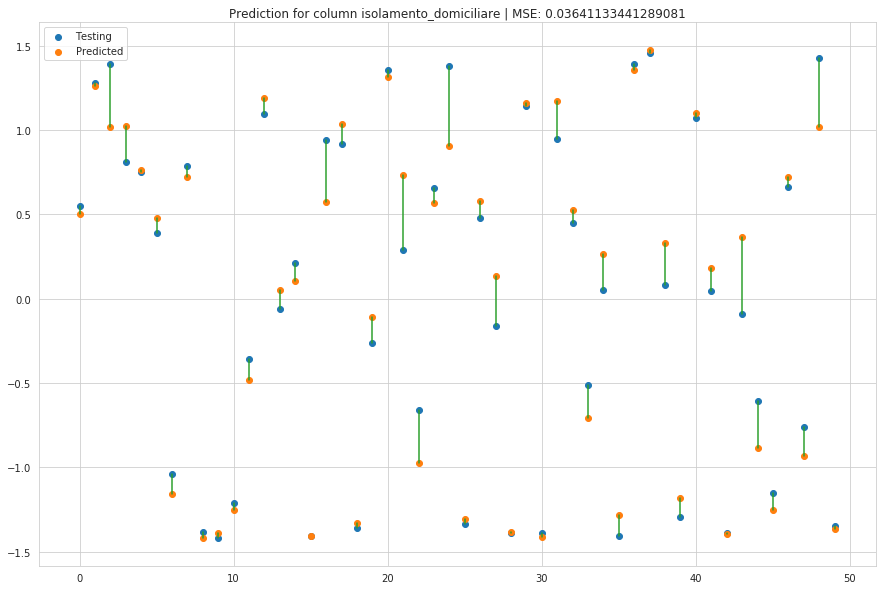

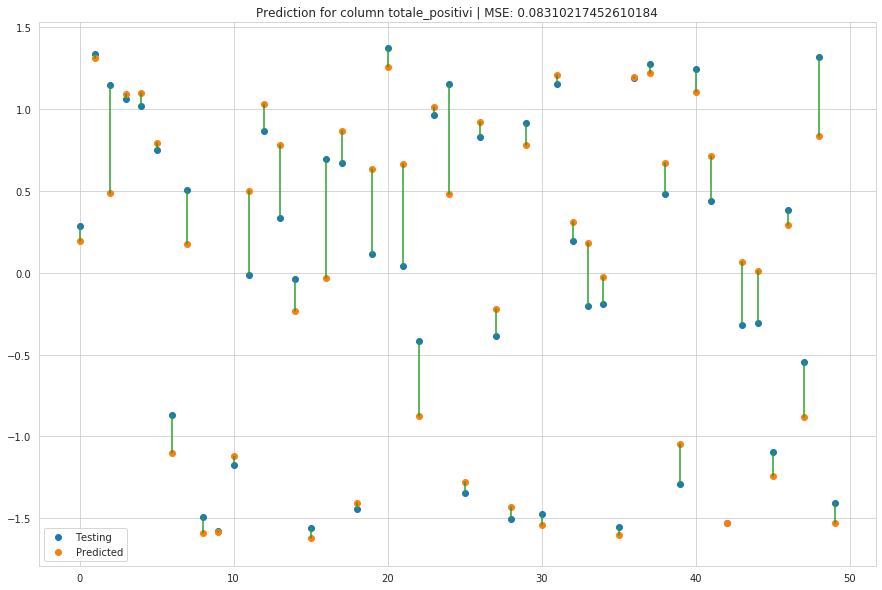

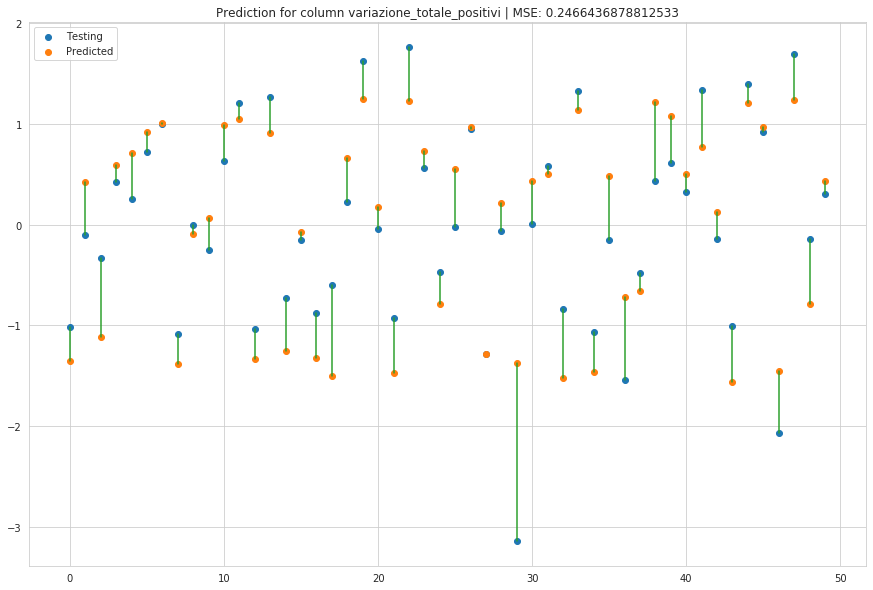

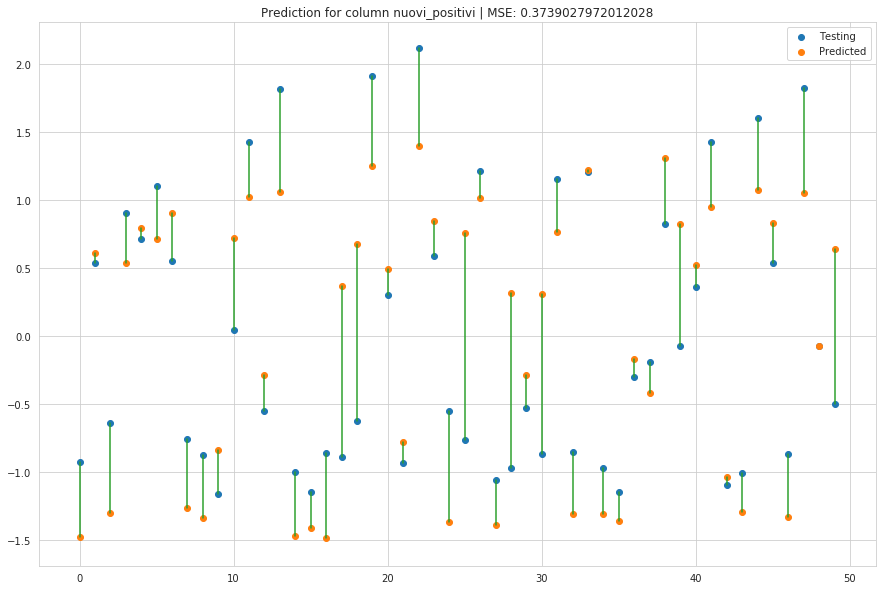

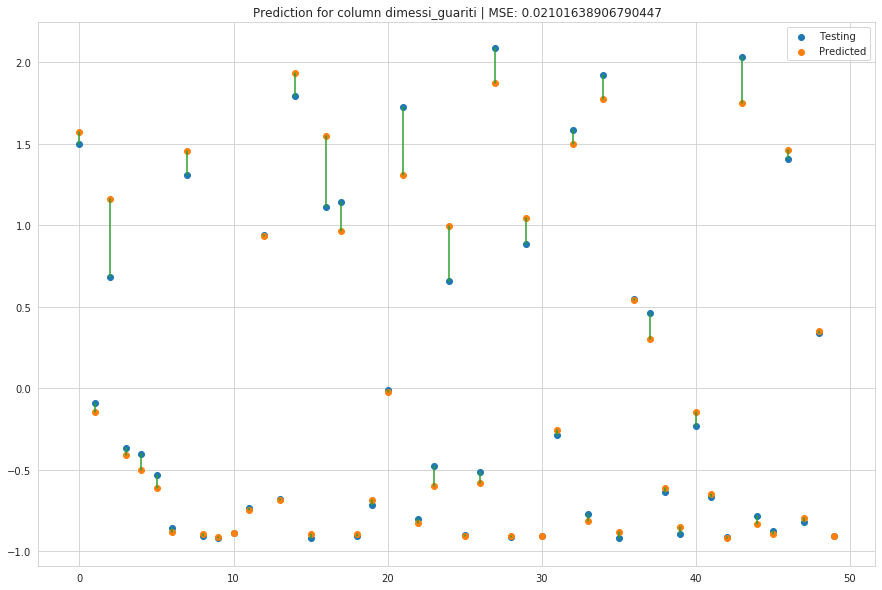

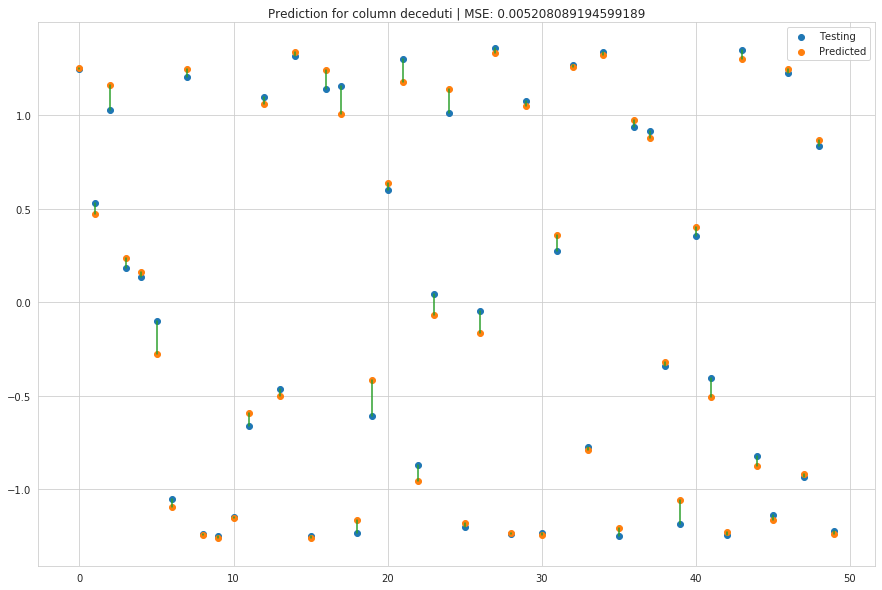

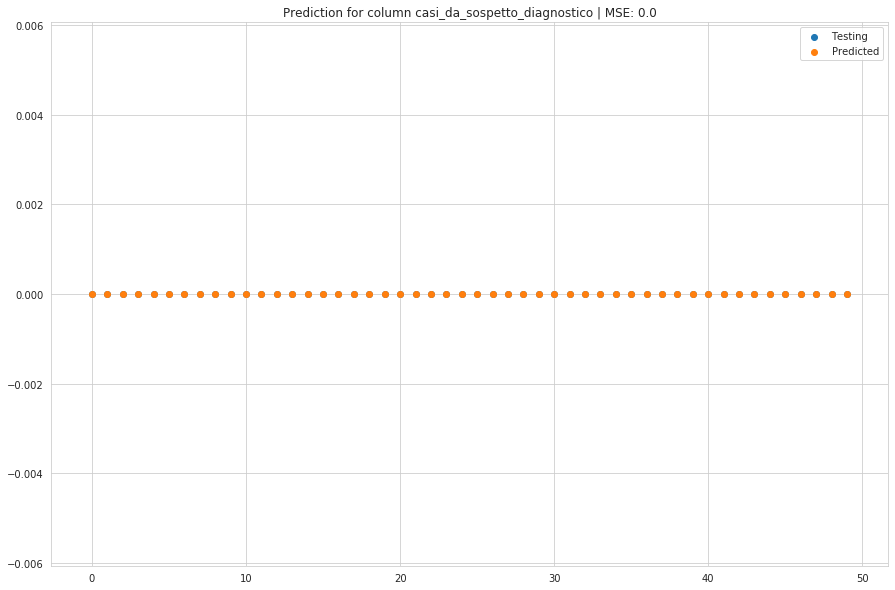

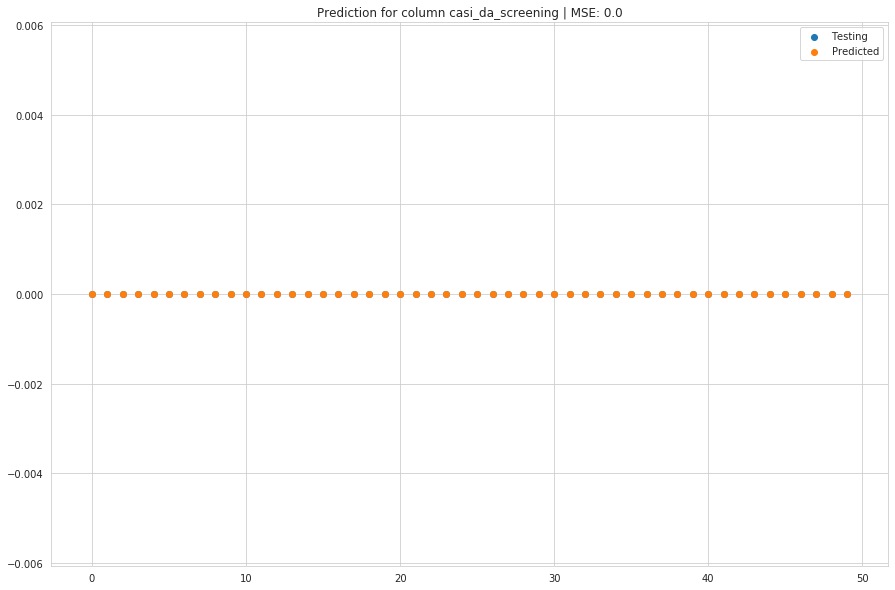

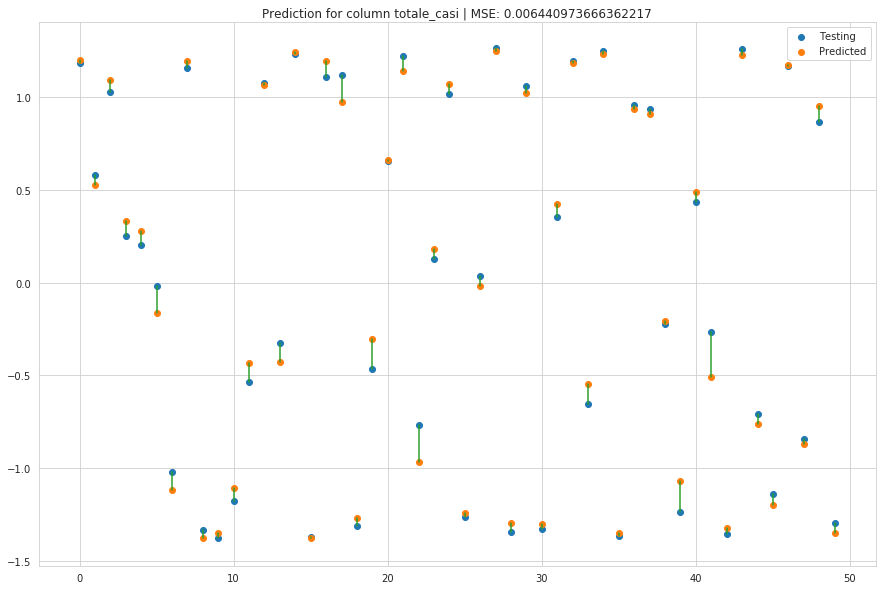

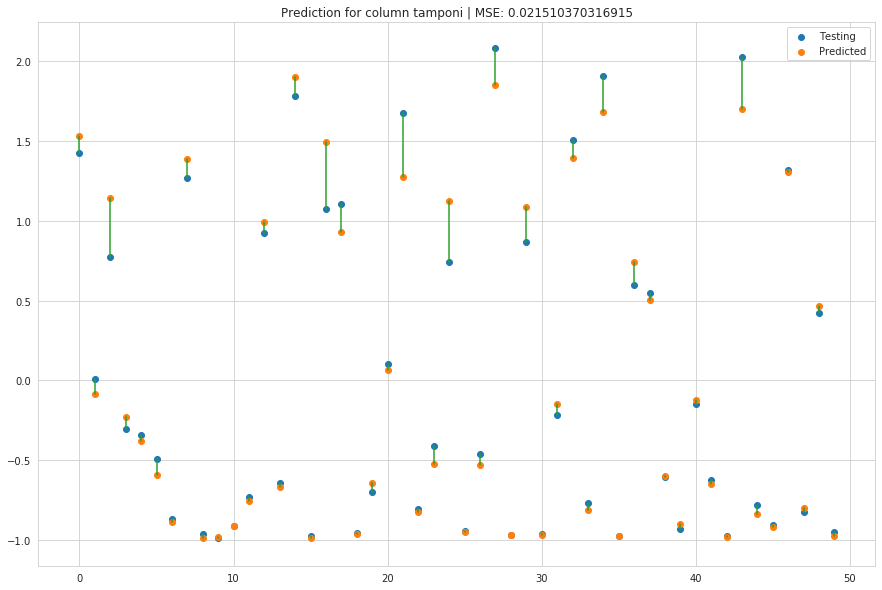

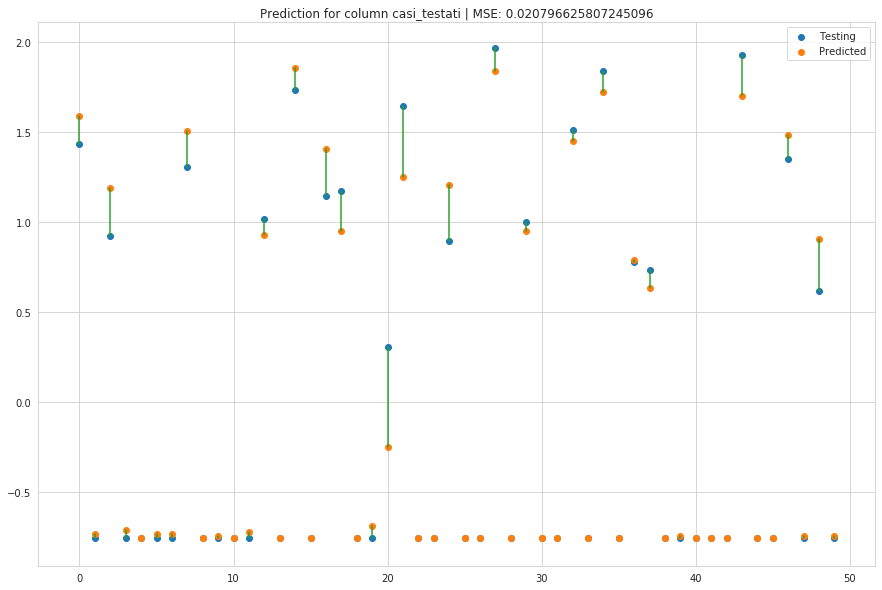

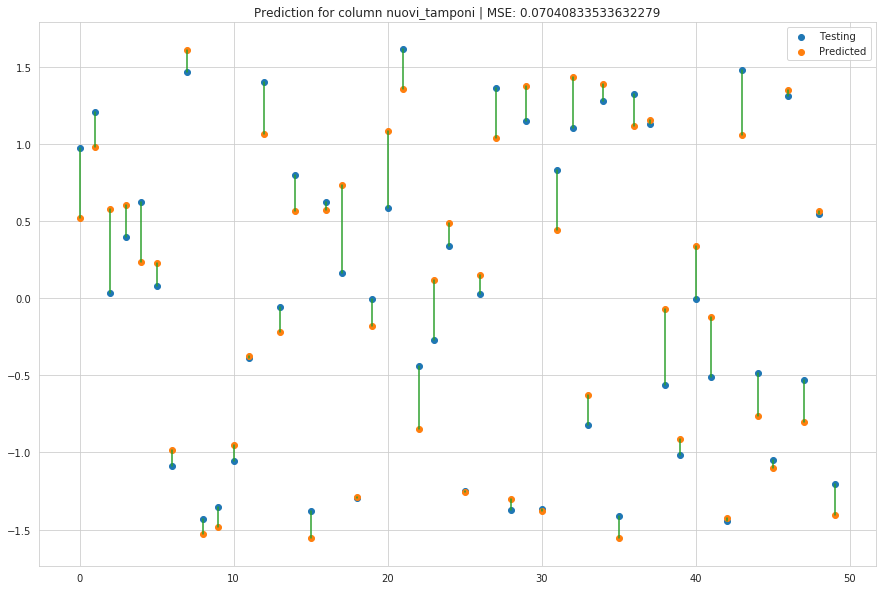

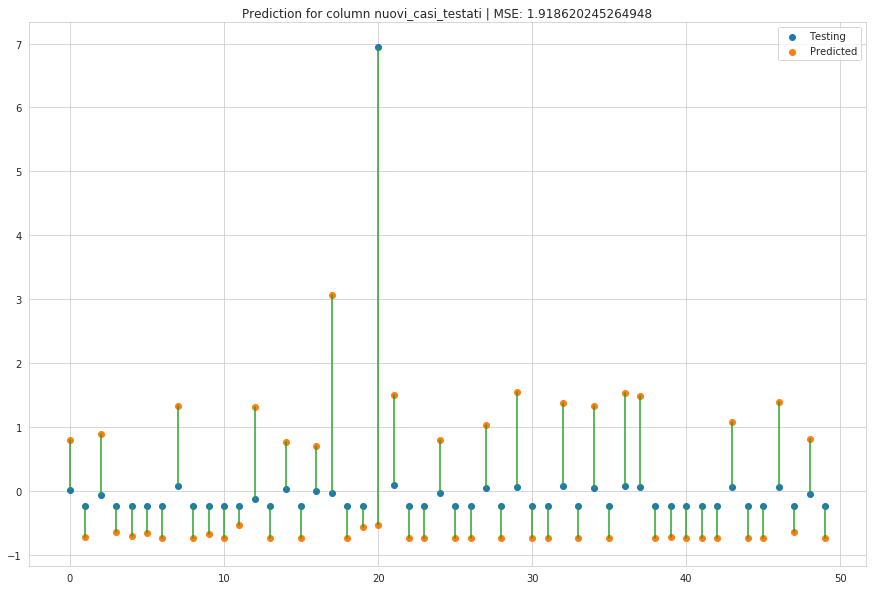

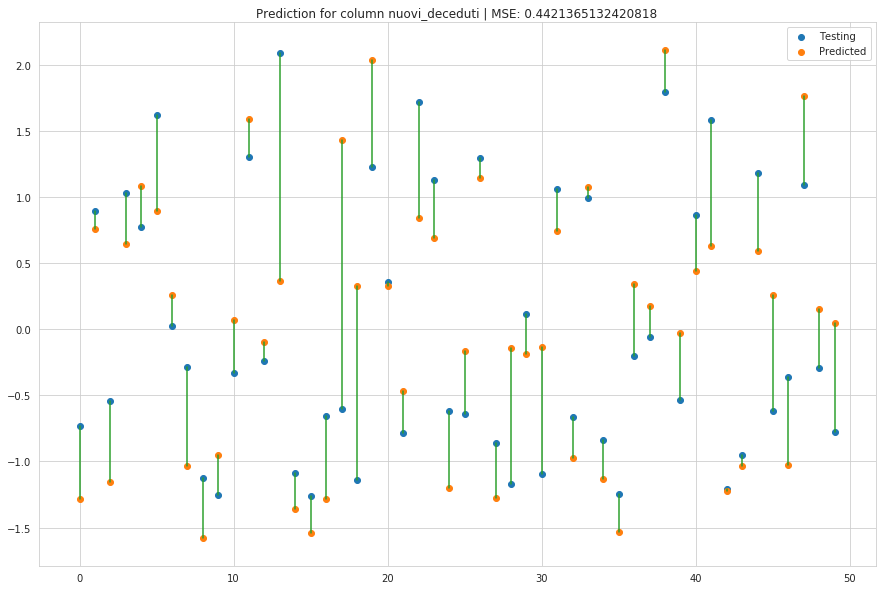

In [54]:
from sklearn.ensemble import RandomForestRegressor as Reg

average_mse = np.inf

cols = ['test_size', 'n_estimators', 'bootstrap', 'oob_score','prociv_col','mse']
mse_data = pd.DataFrame()

#for test_size in np.linspace(0.1, 0.5, 10):
#    for n_estimators in [60, 80, 100, 110]:
#        for bootstrap in [True, False]:
#            for oob_score in [True,False]:

for prociv_col in prociv_national.columns[1:]:

    indexes = [i for i in prociv_national.index if prociv_national.loc[i, 'data'] in articles.index]
    target = prociv_national.loc[indexes, prociv_col].values

    X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=test_size, random_state=42)

    if bootstrap == False:
        oob_score = False

    regressor = Reg(n_estimators = 100, 
                   bootstrap = True, 
                   oob_score = False,
                   n_jobs = -1) #`Use all cores


    regressor.fit(X_train, y_train)

    predicted_y = regressor.predict(X_test)

    all_data = []

    for i in range(len(predicted_y)):
        all_data.append([y_test[i], predicted_y[i]])

    #scaler = Scaler()

    y_test = []
    y_pred = []

    for elem in scaler.fit_transform(all_data):

        y_test.append(elem[0])
        y_pred.append(elem[1])

    mean_square_error = mse(y_test, y_pred)
    #print(mean_square_error)
    mse_data = mse_data.append(pd.DataFrame(data = [[test_size, n_estimators, bootstrap, oob_score, prociv_col, mean_square_error]], columns = cols))

    
    plt.figure(figsize = (15, 10))
    plt.scatter(range(len(y_test)), y_test, color = 'C0')
    plt.scatter(range(len(y_test)), y_pred, color = 'C1')
    plt.title('Prediction for column ' + prociv_col + ' | MSE: '+ str((mean_square_error)))
    plt.legend(['Testing', 'Predicted'])

    for x, y1, y2 in zip(range(len(y_test)), y_test, y_pred):
        plt.plot([x,x], [y1, y2], color = 'C2')

    #plt.savefig('/home/marco/workspace/git/StatLearnTeam/articles_analysis/plots/predictions/column_'+prociv_col+'.png')
    plt.show()
    

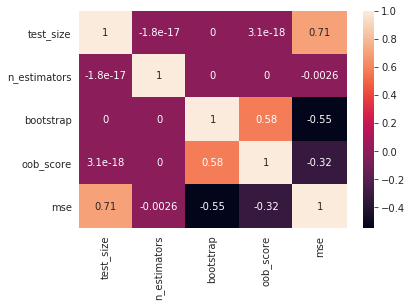

,test_size,n_estimators,bootstrap,oob_score,prociv_col,mse
0,0.188889,100,True,False,totale_casi,0.000587


In [50]:
sns.heatmap(mse_data.corr(), annot = True)
plt.show()

mse_data[mse_data.mse == mse_data.mse.min()] # Show parameters for minimum mse